# Experiment: AlexNet implementation without any training

We ran the challenge pipeline on our AlexNet model without any training. It initializes with random weights using
'he_normal' for convolutional layers, and 'glorot_normal' for the dense layers.

This untrained model got a challenge score of `15.12` when taken from layer `conv2d_5_pool`, and provides a baseline to compare the trained models against, as well as to compare performance of untrained Alexnet implementation from Torch Hub that we initially used. All trained/finetuned models got higher scores, and the untrained Alexnet implementation from Torch Hub got a comparable result of `14.66`.

Below is the correlation graph for subject 1. It looks similar to the trained models for early layers, which may be because early-layer features are more general-purpose and relatively easy to predict. However, for later layers, correlation scores are low, especially for the median correlation among all vertices. 

### conv2d_5_pool (Subject 1)

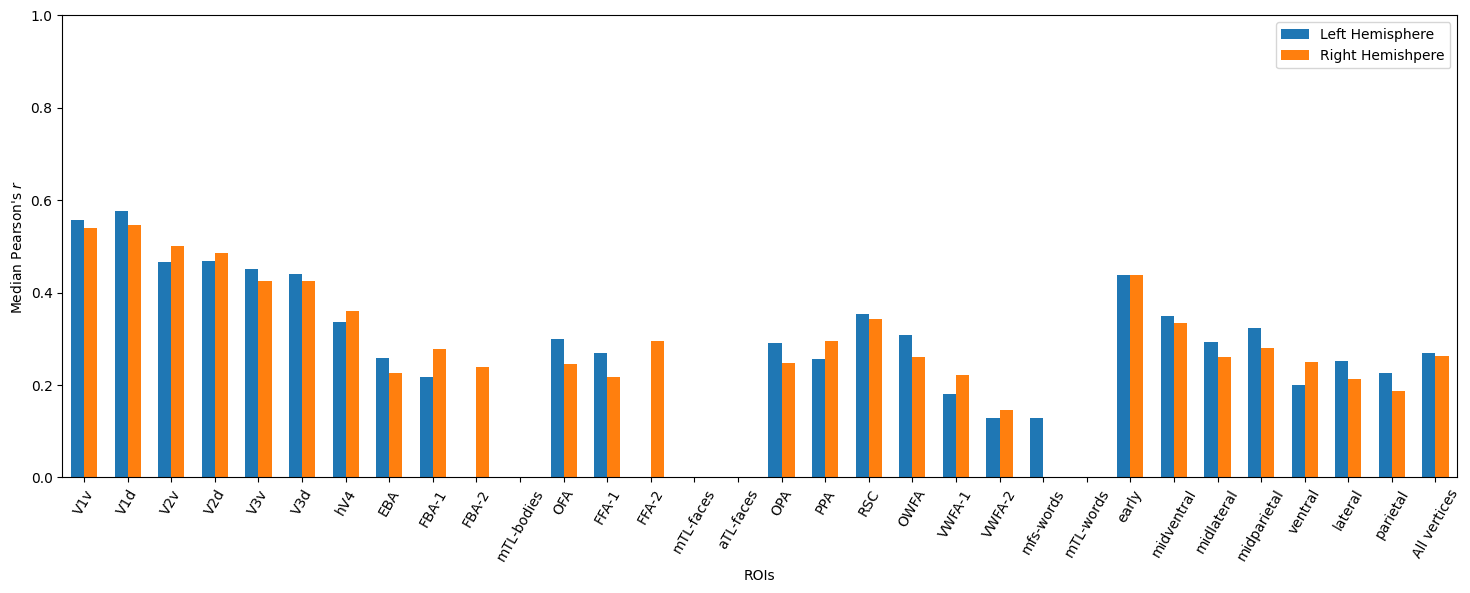

In [ ]:
from src.algonauts.models import model_loaders

In [ ]:
experiment = 'alexnet_with_random_weights'
batch_size = 300

In [ ]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    challenge_data_dir = '../data/algonauts_2023_challenge_data'
    exp_output_dir = f'../data/out/{experiment}'

if platform == 'paperspace':
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load AlexNet implementation with random weights

The output layer does not really matter, since we will pick from an earlier layer. We used 10000 since that's the original
number of classes in Imagenet, but changing this should not affect performance.

In [ ]:
num_classes = 10000
model_loader = lambda: model_loaders.load_alexnet(10000)

### Print the model layers

In [ ]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-28 23:17:09.905470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 23:17:09.906343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten -> dense -> dropout -> dense_1 -> dropout_1 -> dense_2


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [ ]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

In [ ]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)

## Merge predictions from best layers for each ROI

In [ ]:
from src.algonauts.evaluators.predictions import merge_predictions_for_all_subjects
merge_predictions_for_all_subjects(subjects, challenge_data_dir, exp_output_dir)

## Print best layers

In [ ]:
import json
from src.algonauts.evaluators.correlations import find_best_correlations

subj = 1
result = find_best_correlations(f'{exp_output_dir}/results.json', subj)
print(json.dumps(result, indent=2))
